# Network Science 2024/2025

**Authors:**  
- Adriano Machado (202105352)  
- Francisco da Ana (202108762)  
- João Lima (202108891)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Key Network Properties

### Exercise 1 - Consider the simple (undirected) network represented by the following graph:

![image.png](docs/ex1graph.png)

### (a) Show the degree of each node and make a plot of its (normalized) degree distribution.

- Degree Calculation:
    - Degree(A) = 2 (connected to B and C)
    - Degree(B) = 3 (connected to A,C,E)
    - Degree(C) = 4 (connected to A,B,D,E)
    - Degree(D) = 2 (connected to C,F)
    - Degree(E) = 2 (connected to B,C)
    - Degree(F) = 1 (connected to D)

- Normalized P(k):
    - P(k=1) = 1/6 (node F)
    - P(k=2) = 3/6 (nodes A,D,E)
    - P(k=3) = 1/6 (node B)
    - P(k=4) = 1/6 (node C)
    - Check: 1/6 + 3/6 + 1/6 + 1/6 = 1

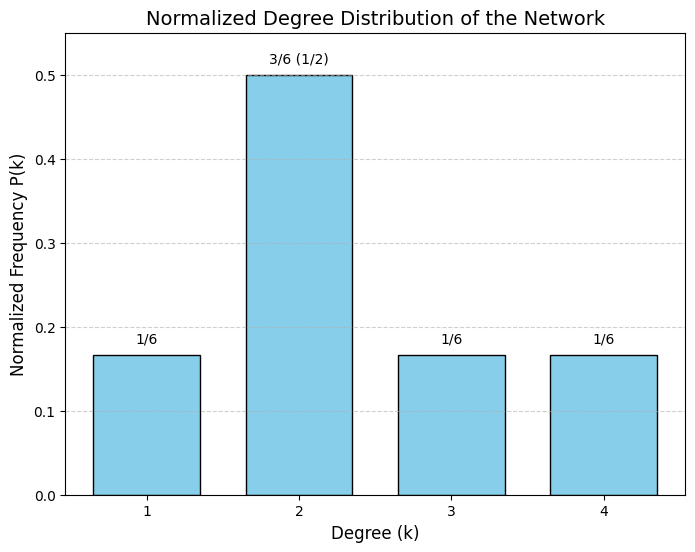

In [ ]:
degrees = [1, 2, 3, 4]
probabilities = [1/6, 3/6, 1/6, 1/6] 

plt.figure(figsize=(8, 6)) 
bars = plt.bar(degrees, probabilities, width=0.7, color='skyblue', edgecolor='black')

plt.xlabel("Degree (k)", fontsize=12)
plt.ylabel("Normalized Frequency P(k)", fontsize=12)
plt.title("Normalized Degree Distribution of the Network", fontsize=14)

plt.xticks(degrees)

plt.ylim(bottom=0, top=max(probabilities) * 1.1)

for bar in bars:
    yval = bar.get_height()
    if np.isclose(yval, 1/6):
        label = "1/6"
    elif np.isclose(yval, 3/6):
        label = "3/6 (1/2)"
    else:
        label = f"{yval:.3f}" 
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, label, ha='center', va='bottom', fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### (b) Calculate the diameter and the average path length of the network
- Diameter: The longest shortest path in the network

- Shortest Paths:
    - d(A,B) = 1; d(A,C) = 1; d(A,D) = 2; d(A,E) = 2; d(A,F) = 3
    - d(B,C) = 1; d(B,D) = 2; d(B,E) = 1; d(B,F) = 3
    - d(C,D) = 1; d(C,E) = 1; d(C,F) = 2
    - d(D,E) = 2; d(D,F) = 1
    - d(E,F) = 3

- Longest Shortest Path (diameter): The longest shortest path is 3 (between A and F, B and F, E and F)

- Average Path Length: Avergae of all shortest path lengths
    - Number of pairs = (6*5)/2 = 2
    - Sum of shortest paths = 1+1+2+2+3+1+2+1+3+1+1+2+2+1+3 = 26
    - Average path length = Sum of shortest paths / Number of pairs = 26 / 15 = 1.733

### (c) Calculate the local clustering coefficient of each node and the average local clustering coefficient of the entire network.
- Max edges = degree * (degree-1) / 2

- Local Clustering Coefficient for each node:
    - C(A) -> Max edges = 1; Actual Edges = 1 (B,C); C(A) = 1/1 = 1
    - C(B) -> Max edges = 3; Actual Edges = 2 {(A,C), (C,E)}; C(B) = 2/3
    - C(C) -> Max edges = 6; Actual Edges = 2 {(A,B),(B,E)}; C(C) = 2/6 = 1/3
    - C(D) -> Max edges = 1; Actual Edges = 0; C(D) = 0
    - C(E) -> Max edges = 1; Actual Edges = 1 (B,C); C(E) = 1
    - C(F) = 0 (less than 2 neighbours)

- Average Local Clustering Coefficient = (1 + 2/3 + 1/3 + 0 + 1 + 0) / 6 = 0.5

### (d) Calculate the (normalized) betweenness centrality and closeness centrality of each node.
- Betweeness Centrality: Measures how often a node lies on the shortest paths between other nodes.
- Maximum Possible for N nodes: (N-1)(N-1)/2 = 10

- Betweenness Centrality for each node:
    - A -> 0
    - B -> A-E (path A-B-E, 1/2 contribution as A-C-E is also shortest) -> 0.5
    - C -> A-D (1), A-E (path A-C-E, 1/2), A-F (1), B-D (1), B-F (1), D-E (1), E-F (1) -> 1 + 0.5 + 1 + 1 + 1 + 1 + 1 = 6.5
    - D -> A-F (1), B-F (1), C-F (1), E-F (1) -> 1 + 1 + 1 + 1 = 4
    - E -> 0
    - F -> 0

- Normalized BC:
    - BC(A) = 0 / 10 = 0
    - BC(B) = 0.5 / 10 = 0.05
    - BC(C) = 6.5 / 10 = 0.65
    - BC(D) = 4 / 10 = 0.4
    - BC(E) = 0 / 10 = 0
    - BC(F) = 0 / 10 = 0

- Closeness Centrality:
    - Sum of Distances on each node:
        - Sum of Distances on Node A: 1+1+2+2+3 = 9
        - Sum of Distances on Node B: 1+1+2+1+3 = 8
        - Sum of Distances on Node C: 1+1+1+1+2 = 6
        - Sum of Distances on Node D: 2+2+1+2+1 = 8
        - Sum of Distances on Node E: 2+1+1+2+3 = 9
        - Sum of Distances on Node F: 3+3+2+1+3 = 12

    - Closeness Centrality for each node (N-1=5):
        - CC(A) = 5/9
        - CC(B) = 5/8
        - CC(C) = 5/6
        - CC(D) = 5/8
        - CC(E) = 5/9
        - CC(F) = 5/12

### Exercise 2
The global clustering Coefficient metric gives a single value representing the overall tendency for nodes in the network to cluster together. It essentially asks: "Out of all possible triangles (based on existing paths of length 2), what fraction actually exist?". While, the Local clustering Coefficient metric first calculates how clustered the neighborhood around each node is, and then averages these individual values across the entire network.

- Global clustering Coefficient
    - The denominator ("number of triplets") counts all connected paths of length two (A-B-C) where a node with a high degree k acts as the central node (like 'B' in A-B-C) for a large number of triplets (high-degree nodes contribute disproportionately large numbers of triplets to the denominator).
    - The numerator ("number of triangles") counts  closed triplets. Besides that, triangles involving high-degree nodes also contribute significantly to this count (multiplied by 3).

- Local clustering Coefficient
    - Each node's Ci contributes equally to the final average (with a weight of 1/N).
    - The local clustering coefficient Ci of a high-degree node counts exactly the same as the Ci of a low-degree node when calculating the average.
    - Local Clustering Coefficient can be heavily influenced by the many low-degree nodes in a network, even if their individual contribution to the total number of triangles or triplets in the network is small. If many low-degree nodes have high local clustering (e.g., Ci=1), they can significantly raise Local Clustering Coefficient, regardless of the clustering around high-degree hubs

- So, The Global Clustering Coefficient measures the overall density of triangles relative to all possible triangles (triplets) across the entire network. Because high-degree nodes participate in vastly more triplets than low-degree nodes, the connectivity patterns in their neighborhoods heavily influence this global ratio.
In contrast, the Average Local Clustering Coefficient first calculates a clustering score for each node individually, based only on its immediate neighbors. It then computes a simple average of these individual scores. In this average, every node's score has equal weight, regardless of its degree. This equal weighting per node tends to lessen the overall impact of high-degree nodes compared to their strong influence on Global Clustering Coefficient.

- So, to conclude, the Global Clustering Coefficient gives more importance to high-degree nodes.

## Using Gephi

### Exercise 3

Answer to the following questions. For each one give a brief explanation of the steps you took. For
top-k like questions you need to show the name and city of the airports and also the respective numbers
(ex: number of flights or centrality value). If there are ties, show all tied answers on the k first positions.
You might need to use various features of Gephi (appearance, layouts, filters and statistics). If needed,
you can just reload the network to have a fresh restart.

### (a) What is the number of airports and flights in the network?
- **Steps Taken:**
  - Loaded the GEXF file into Gephi, choosing the not to merge option.
  - In the *Context* window we can see our graph has 
  - Check the *Graph Overview* for the number of nodes (airports) and edges (flights).
  
![alt text](docs/ex3A.png)

- **Results:**
  - **Number of airports (nodes):** 3147
  - **Number of flights (edges):** 66679


### (b) On average, an airport has how many outgoing flights? And to how many different airports?

Both parts of this question can be answered using the *Average Degree* statistic in Gephi. In the first, we check the average *out-degree* of the nodes with the **Not merging** strategy as opose to the second part where we can use some **merge** strategy and check the average *out-degree* of the nodes.

Since in a directed graph the sum of all in-degrees equals the sum of all out-degrees. 

AvgDegree = Avg In-Degree + Avg Out-Degree <br>
Avg Out-Degree = AvgDegree/2

- **Steps Taken:**
  - Loaded the GEXF file into Gephi, choosing the **not to merge** option.
  - In the *Statistics* panel, select the *Average Degree* statistic 
  - Observed a *Average Degree* of 21.188. Making the average out-degree 10.594.

  <br>

  - Loaded the GEXF file into Gephi, choosing the **merge** option.
  - In the *Statistics* panel, select the *Average Degree* statistic.
  - Observed a *Average Degree* of 21.188. Making the average out-degree 11.699.

- **Results:**
  - **Average outgoing flights per airport:** `10.594`
  - **Average number of destinations per airport:** `11.699`

### (c) What is the diameter and average path length of the network?
- **Steps Taken:**
  - Ran the *Network Diameter* statistic.
  - Observed a *Diameter* of 13 and a *Average Path Length* of 3.969.

- **Results:**
  - **Network Diameter:** `13`
  - **Average Path Length:** `3.969`

### (d) List the top-5 pairs of airports with more flights between each other.
- **Steps Taken:**
  - Loaded the GEXF file into Gephi, choosing the **sum merge strategy.**
  - Used the *Edges Table* to sort edges by weight.
  - Extracted the following top-5 pairs with the highest edge weights.

- **Results:**
  - **Top-5 airport pairs with highest flights:**
    1. `3830 - 3682` (Flights: `20`)
    2. `3682 - 3830` (Flights: `19`)
    3. `3179 - 3885` (Flights: `13`)
    4. `3830 - 3861` (Flights: `13`)
    5. `3682 - 3576` (Flights: `12`)

### (e) List the top-5 of the airports that have flights to the highest number of other airports.
We achieve this by loading the graph with a merge strategy (in our case we used SUM) so each pair of airports only has one edge between them, and then finding nodes with the highest out-degree.

- **Steps Taken:**
  - Loaded the GEXF file into Gephi, choosing the **SUM merge strategy**.
  - Ran the *Average Degree* statistic in the *Statistics* panel (this calculates in-degree and out-degree for all nodes).
  - Went to the *Data Laboratory* and selected the *Nodes* table.
  - Sorted the table by the 'Out-Degree' column in descending order.
  - Identified the top 5 nodes (airports) based on their Out-Degree. 

- **Results:**
  - **Top-5 airports by number of destinations (Out-Degree):**
    1. `340` (Out-Degree: `239`)
    2. `1382` (Out-Degree: `237`)
    3. `580` (Out-Degree: `232`)
    4. `1701` (Out-Degree: `224`)
    5. `3682` (Out-Degree: `217`)

### (f) List the top-5 of the airports with highest normalized betweenness centrality.

Betweenness Centrality measures how often a node lies on the shortest paths between other nodes. Normalized centrality adjusts this value, typically to a range between 0 and 1.

- **Steps Taken:**
  - Ran the *Network Diameter* statistic in the *Statistics* panel, choosing the option *Normalize centralities*.
  - Went to the *Data Laboratory* and selected the *Nodes* table.
  - Sorted the table by the 'Betweenness Centrality' column in descending order.
  - Identified the top 5 nodes (airports).
- **Results:**
  - **Top-5 airports by Normalized Betweenness Centrality:**
    1. `3484` (Betweenness Centrality: `~0.085`) - Los Angeles International Airport (LAX)
    2. `1382` (Betweenness Centrality: `~0.072`) - Charles de Gaulle International Airport (CDG)
    3. `507` (Betweenness Centrality: `~0.062`) - London Heathrow Airport (LHR)
    4. `3364` (Betweenness Centrality: `~0.057`) - Beijing Capital International Airport (PEK)
    5. `3830` (Betweenness Centrality: `~0.055`) - Chicago O'Hare International Airport (ORD)

### (g) Consider Ted Stevens Anchorage International Airport. What is its global ranking in terms of betweenness centrality and out-degree? Can you explain the discrepancy? Indicate two other airports with the same kind of behavior (high betweenness centrality but relatively low out-degree).

- **Steps Taken:**
  - Identified in the *Data Laboratory* that the Ted Stevens Anchorage International Airport (ID `3774`, IATA: ANC) has the 8th highest betwenness centrality(0.0526) and the  274th highest out-degree (59).
  - To facilitate the analysis, only selected the columns of interest: `ID`,`IATA`,`Out-Degree`, `Betweenness Centrality`. Sorted by `Betweenness Centrality` (descending).
  - From here we notice the Guarulhos Airport (ID `2564`) and the Brisbane International Airport (ID `3320`) have a similar behavior of high betweenness centrality but low out-degree. With Guarulhos having a betweenness centrality of `0.048` and an out-degree of 193, and Brisbane having a betweenness centrality of `0.035` and an out-degree of `151`.


### (h) List the top-5 of countries with the highest number of airports.

- **Steps Taken:**
  - Loaded the GEXF file into Gephi.
  - In the *Overview* panel, selected the *Nodes* and *Partition* tabs.
  - Chose the *country* attribute from the list of available attributes.

  ![alt text](docs/ex3H.png)

- **Results:**
  - **Top-5 countries by number of airports:**
    1. United States (16.68%)
    2. Canada (6.48%)
    3. China (5.5%)
    4. Brazil (3.56%)
    5. Australia (3.53%)


### (i) List the top-5 of airlines with the highest number of flights. (info about airline codes)

- **Steps Taken:**
  - Loaded the GEXF file into Gephi.
  - In the *Overview* panel, selected the *Edges* and *Partition* tab.
  - Chose the *country* attribute from the list of available attributes.

![alt text](docs/ex3I.png)

- **Results:**
  - **Top-5 airlines by number of flights:**
    1. `FR`: (3.73%)
    2. `AA`: (3.53%)
    3. `UA`: (3.26%)
    4. `DL`: (2.97%)
    5. `US`: (2.94%)


### (j) What is the number of domestic flights inside China?

- **Steps Taken:**
  - Loaded the GEXF file into Gephi (no merge required).
  - Went to the Filters panel (right side).
  - Expanded Attributes -> Partition.
  - Dragged Node country into the Queries are, selected China from the list.
  - Observed an edge count of 7101

- **Results:**
  - Number of domestic flights inside China: 1346


### (k) How many airports in USA fly to at least 50 other airports in the global network?

-   **Steps Taken:**
    1.  Loaded the GEXF file. When prompted about multiple edges, chose the **First merge strategy** to ensure each pair of connected airports (in a specific direction) has only one edge.
    2.  In the *Statistics* panel, under *Network Overview*, ran the **Average Degree** statistic. This computes the `Out-Degree` for each node.
    3.  Went to the *Filters* panel.
    4.  Configured the individual filters first:
        *   Under *Attributes* -> *Partition*, selected `Node: country`. In its parameters, chose `United States`.
        *   Under *Attributes* -> *Range*, selected `Node: Out-Degree`. In its parameters, set the range to `[50.0 .. Max]`.
    5.  Expanded the *Operator* category in the *Filters* library. Dragged the **`INTERSECTION`** operator into the main *Queries* section below.
    6.  Dragged the configured `Node: country` filter (set to United States) and dropped it **onto** the `INTERSECTION` operator in the *Queries* section, nesting it underneath.
    7.  Dragged the configured `Node: Out-Degree` filter (set to >= 50) and dropped it **onto** the same `INTERSECTION` operator, nesting it alongside the country filter.
    8.  Clicked the **Filter** button at the bottom of the Filters panel.

-   **Results:**
    -   **Number of airports in USA flying to at least 50 other airports:** `29`

### (l) How many flights are there between Portugal and Brazil?

-   **Steps Taken:**
    1.  Loaded the GEXF file. When prompted about multiple edges, chose the **not merge strategy**.
    2.  Went to the *Filters* panel.
    3.  Expanded the *Attributes* category in the *Filters* library. Dragged the **country** Filter and selected both Portugal and Brazil. Observed an edge cound of 1300 (E_total = 1300)
    4.  Modify the filter to select only Portugal. Click Filter. Observe edge count: 101. (E_pt = 101)
    5.  Modify the filter to select only Brazil. Click Filter. Observe edge count: 1175. (E_br = 1175)

-   **Results:**
    -   **Number of flights between Portugal and Brazil:** `1300 - 101 - 1175 = 24`


### (m) Consider a network formed only by Ryanair flights. What is the number of nodes and edges of its giant component? Considering only this giant component, what is the most important airport in terms of closeness centrality?

- **Steps Taken:**
  - Loaded the GEXF file into Gephi without merging multiple edges.
  - Applied a filter to include only edges where the "airline" attribute is "FR" (Ryanair).
  - Ran the "Connected Components" statistic to identify the giant component.
  - Filtered the network to display only the giant component using the largest "Component ID".
  - Noted the number of nodes and edges from the "Context" panel. (176 nodes, 5632 edges).
  - On the statistics panel, selected the *Network Diameter* statistic.
  - Sorted nodes by closeness centrality in the "Data Laboratory" to identify the top airport(London Stansted Airport - STN) with 0.782 closeness centrality.

- **Results:**
  - **Number of nodes in the giant component:** 176
  - **Number of edges in the giant component:** 5632
  - **Airport with the highest closeness centrality:** London Stansted Airport (STN) with a closeness centrality of 0.782.
  
![alt text](docs/ex3M.png)

### (n)  How many airport are reachable from Francisco de Sá Carneiro Porto Airport in 1 flight? And in at most 2 flights? And in at most 3 flights?

- **Steps Taken:**
  - Loaded the GEXF file into Gephi with the **SUM merge** strategy.
  - In data laboratory, used cntrol+f to search for the Francisco de Sá Carneiro Porto Airport (ID: 1636).
    3.  Went to the **Filters** panel -> **Topology**.
    4.  Dragged the **Ego Network** filter into the *Queries* area.
    5.  Configured the Ego Network filter:
        *   Set `ID` to `1636`.
        *   Set `Depth` to `1`.
        *   Set without self-loops.

        Notice the value `61` in the **Context** panel. This is the number of reachable airports from OPO in 1 flight.

    
    6.  Modified the Ego Network filter:
        *   Set `Depth` to `2`.

        Notice the value `755` in the **Context** panel. This is the number of reachable airports from OPO in 2 flights.

    7.  Modified the Ego Network filter:
        *   Set `Depth` to `3`.

        Notice the value `2376` in the **Context** panel. This is the number of reachable airports from OPO in 3 flights.

- **Results:**
  - **Number of airports reachable from Francisco de Sá Carneiro Porto Airport in 1 flight:** `61`
  - **Number of airports reachable from Francisco de Sá Carneiro Porto Airport in at most 2 flights:** `755`
  - **Number of airports reachable from Francisco de Sá Carneiro Porto Airport in at most 3 flights:** `2376`


### (o) Create an image showing the flight network between american and canadian aiports with more than 100 destinations in the global network. The size of the nodes should reflect the global betweenness centrality, and their colors should be different for each time zone. Nodes should be labeled with the city name. Try to make your image as comprehensible and aesthetically pleasing as possible.

- **Steps Taken:**
  - Loaded the GEXF file into Gephi with the **SUM merge strategy** to ensure Out-Degree correctly reflects the number of unique destinations.
  - In the *Statistics* panel, ran **Average Degree** to calculate In-Degree and Out-Degree for all nodes in the entire network.
  - Ran **Network Diameter** with the "Directed" option checked to calculate betweenness centrality.
  - Applied filters:
    - Created an **INTERSECTION** filter combining:
      - **Node: country** filter set to `United States` and `Canada`
      - **Node: Out-Degree** filter set to range `[101 .. 239]`
    - This resulted in 19 nodes and 338 edges.
  - Applied visual mappings:
    - **Color:** Used **Partition** by **`tz`** (timezone) attribute, generating colors without limiting the number.
    - **Size:** Used **Ranking** by **`Betweenness Centrality`** with Min size 50 and Max size 400.
  - Applied **Geo Layout** with scale 10000.
  - Enabled node labels, displaying the **city** attribute with size 32.

  ![alt text](docs/ex3O.png)

## Erdos-Renyi Model

### Exercise 4
> Write code for generating a random network following the Gn,p Erdos-Renyi model, that is, a network with n nodes, where each pair of nodes has probability p of being connected.
Include as attached files, two random networks random1.txt and random2.txt generated respectively with n = 2000,p = 0.0001 and n = 2000,p = 0.005 (in the described format).

In [20]:
class Graph:
    def __init__(self, n: int = None, filename: str = None):
        """
        Initializes a graph with n nodes (with no connections) or loads it from a file (.txt with the specified configuration).
        Sets all nodes as unvisited.
        """
        if filename:
            with open(filename, 'r') as file:
                first_line = file.readline().strip()
                if first_line:
                    self.n = int(first_line)
                    self.adj_matrix = [[0 for _ in range(self.n)] for _ in range(self.n)]
                for line in file:
                    a, b = map(int, line.strip().split())
                    self.add_edge(a - 1, b - 1)
        elif n is not None:
            self.n = n
            self.adj_matrix = [[0 for _ in range(n)] for _ in range(n)]
        else:
            raise ValueError("Either 'n' or 'filename' must be provided.")
        self.visited = [False] * self.n

    def add_edge(self, a : int, b : int):
        self.adj_matrix[a][b] = 1
        self.adj_matrix[b][a] = 1

    def add_edges(self, a : int, targets : list):
        for target in targets:
            self.add_edge(a, target)
 
    def has_edge(self, a, b):
        return self.adj_matrix[a][b] == 1

    def save_to_file(self, filename):
        with open(filename, 'w') as file:
            file.write(f"{self.n}\n")
            for i in range(self.n):
                for j in range(i + 1, self.n):
                    if self.adj_matrix[i][j] == 1:
                        file.write(f"{i + 1} {j + 1}\n")

    def calculate_giant_component_size(self):
        self._set_all_unvisited()
        max_size = 0
        for i in range(self.n):
            if not self.visited[i]:
                size = self.component_size(i)
                max_size = max(max_size, size)
        return max_size

    def component_size(self, node):
        stack = [node]
        size = 0
        while stack:
            current_node = stack.pop()
            if not self.visited[current_node]:
                self.visited[current_node] = True
                size += 1
                for neighbor in self._get_neighbors(current_node):
                    if not self.visited[neighbor]:
                        stack.append(neighbor)
        return size
    
    def get_degree_of_node(self, node):
        return sum(self.adj_matrix[node])
    
    def _set_all_unvisited(self):
        self.visited = [False] * self.n

    def _get_neighbors(self, node):
        return [i for i in range(self.n) if self.adj_matrix[node][i] == 1]

In [21]:
class ErdosRenyiModel(Graph):
    def __init__(self, n : int, p : float):
        super().__init__(n)
        self.p = p
        self._generate_graph()

    def _generate_graph(self):
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if random.random() < self.p:
                    self.add_edge(i, j)

In [22]:
# Exercise 4
net1 = ErdosRenyiModel(n = 2000, p = 0.0001)
net2 = ErdosRenyiModel(n = 2000, p = 0.005)
net1.save_to_file('docs/random1.txt')
net2.save_to_file('docs/random2.txt')

### Exercise 5
> Write code for computing the size of the giant component of a given network.
Use it to compute the size of giant component of the two random networks you generated (random1.txt
and random2.txt), and show the obtained results.
Hint: you can use any graph method traversal to compute the giant component, such as breadth-first
search (BFS) or depth-first search (DFS). Take care to implement an O(n) algorithm that only passes
trough each node once.

In [23]:
net1 = Graph(filename='docs/random1.txt')
net2 = Graph(filename='docs/random2.txt')
print(f"Size of the giant component in random1.txt: {net1.calculate_giant_component_size()}")
print(f"Size of the giant component in random2.txt: {net2.calculate_giant_component_size()}")

Size of the giant component in random1.txt: 4
Size of the giant component in random2.txt: 2000


### Exercise 6
> The following is an exercise to study the emergence of a giant component.
Combining your previous code, generate a series of random networks with n = 2000 and p varying
from 0.0001 to 0.005 (with steps of 0.0001).
Show a plot of your results, with the X axis representing p and the Y axis representing the size of the
giant component.
Was the plot what you were expecting? What is the shape of it? At what average degree values do
you notice something happening?


p: 0.0001, Size of the giant component: 5
p: 0.0002, Size of the giant component: 13
p: 0.0003, Size of the giant component: 16
p: 0.0004, Size of the giant component: 44
p: 0.0005, Size of the giant component: 53
p: 0.0006, Size of the giant component: 572
p: 0.0007, Size of the giant component: 1024
p: 0.0008, Size of the giant component: 1283
p: 0.0009, Size of the giant component: 1554
p: 0.0010, Size of the giant component: 1579
p: 0.0011, Size of the giant component: 1707
p: 0.0012, Size of the giant component: 1781
p: 0.0013, Size of the giant component: 1786
p: 0.0014, Size of the giant component: 1866
p: 0.0015, Size of the giant component: 1868
p: 0.0016, Size of the giant component: 1922
p: 0.0017, Size of the giant component: 1906
p: 0.0018, Size of the giant component: 1929
p: 0.0019, Size of the giant component: 1954
p: 0.0020, Size of the giant component: 1970
p: 0.0021, Size of the giant component: 1965
p: 0.0022, Size of the giant component: 1981
p: 0.0023, Size of the

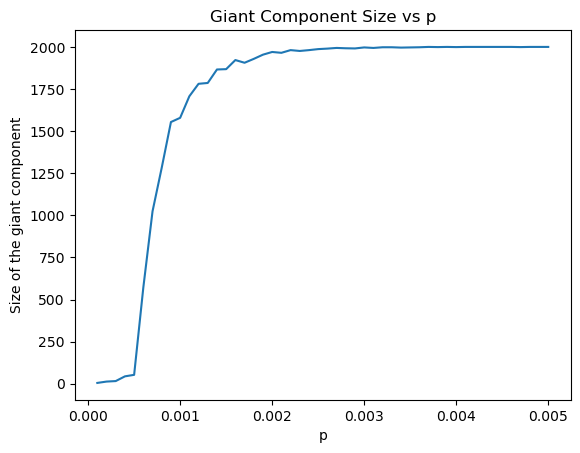

In [24]:
min_p = 0.0001
max_p = 0.005
p_step = 0.0001
sizes = {}

while min_p <= max_p:
    net = ErdosRenyiModel(n=2000, p=min_p)
    size = net.calculate_giant_component_size()
    sizes[min_p] = size
    print(f"p: {min_p:.4f}, Size of the giant component: {size}")
    min_p += p_step

plt.plot(sizes.keys(), sizes.values())
plt.xlabel('p')
plt.ylabel('Size of the giant component')
plt.title('Giant Component Size vs p')
plt.savefig('docs/ex6.png')
plt.show()

In [25]:
1 / (2000 -1)

0.0005002501250625312

The shape of `Giant Component Size vs p` corresponds to what was expected. The plot shows a sharp transition from a small component size to a large component size as p increases, approximately resulting in a Sigmoid curve.
The phase transition starts to occur around `p ≈ 0.0005`

The formula `p * (n-1) = 1` can be written as `p = 1 / (n-1)`. This indicates the vale of `p` at which the phase transition occurs in a graph with `n` nodes. For `n = 2000`, this results in `p ≈ 0.0005`, which is consistent with the observed transition in the plot.

### Exercise 7
> Write code for generating a random network following the BAn,m0,m Barab ́asi-Albert model. This model uses a preferential attachment mechanism and it works in the following way (...)
Include as attached files, two barabasi-albert networks ba1.txt and ba2.txt generated respectively
with n = 2000,m0= 3,m = 1 and n = 2000,m0= 5,m = 2 (in the described format).

In [ ]:
class BarabasiAlbertModel(Graph):
    def __init__(self, n: int, m0: int, m: int):
        """
        Parameters:
        - n: total number of nodes in the graph
        - m0: initial number of nodes in a fully connected graph
        - m: number of edges to attach from a new node to existing nodes
        """
        super().__init__(n)
        self.m0 = m0
        self.m = m
        self.degrees = [0] * n
        self.total_edges = 0 # each edge counted twice, once for each side
        self._generate_graph()
    
    def add_edge(self, a: int, b: int):
        """Override add_edge to update degrees and total_edges"""
        if not self.has_edge(a, b):
            self.adj_matrix[a][b] = 1
            self.adj_matrix[b][a] = 1
            self.degrees[a] += 1
            self.degrees[b] += 1
            self.total_edges += 2
    
    def _generate_graph(self):
        # Fully connected graph with m0 nodes
        for i in range(self.m0):
            for j in range(i + 1, self.m0):
                self.add_edge(i, j)
        
        # Add new nodes one by one
        for i in range(self.m0, self.n):
            targets = self._choose_targets(i)
            for target in targets:
                self.add_edge(i, target)
    
    def _choose_targets(self, new_node):
        """
        Implementation of preferential attachment
        """
        targets = set()
        max_degree = max(self.degrees[:new_node]) or 1  # Avoid division by zero
        
        while len(targets) < min(self.m, new_node):
            candidate = random.randint(0, new_node - 1)
            if random.random() < self.degrees[candidate] / max_degree:
                if candidate not in targets:
                    targets.add(candidate)
        
        return list(targets)
    
    def get_degree_of_node(self, node):
        return self.degrees[node]

In [34]:
net1 = BarabasiAlbertModel(n=2000, m0=3, m=1)
net2 = BarabasiAlbertModel(n=2000, m0=5, m=2)
net1.save_to_file('docs/ba1.txt')
net2.save_to_file('docs/ba2.txt')

### Exercise 8
> The previous process should generate a scale-free network with a power law degree distribution with
exponent α = 3.
Plot the degree distribution of both your generated networks using cumulative binning (see
slides 102 and 103) and try to fit with the corresponding power law function (showing it in the plot).

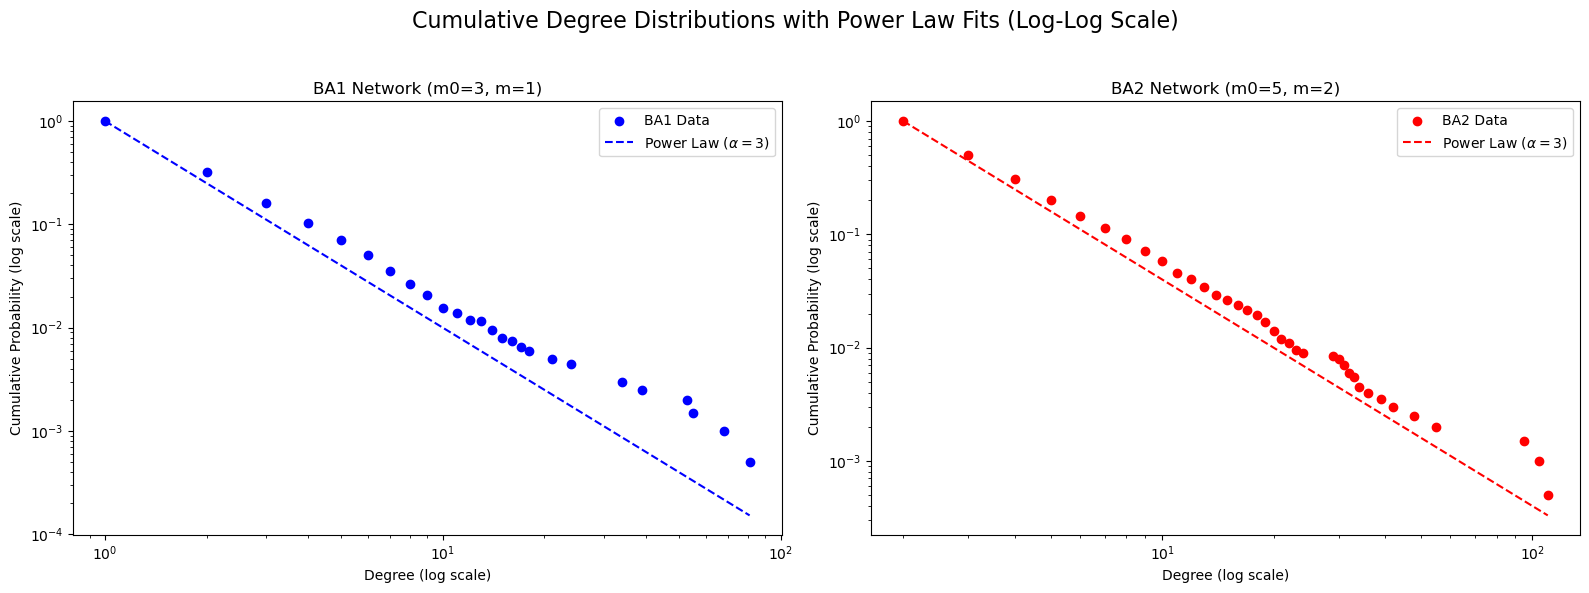

In [47]:
ba1 = Graph(filename='docs/ba1.txt')
ba2 = Graph(filename='docs/ba2.txt')
degrees1 = [ba1.get_degree_of_node(i) for i in range(ba1.n)]
degrees2 = [ba2.get_degree_of_node(i) for i in range(ba2.n)]

unique_degrees1, counts1 = np.unique(degrees1, return_counts=True)
unique_degrees2, counts2 = np.unique(degrees2, return_counts=True)
density1 = counts1 / sum(counts1)
density2 = counts2 / sum(counts2)

alpha = 3
x_range1 = np.linspace(min(unique_degrees1), max(unique_degrees1), 100)
x_range2 = np.linspace(min(unique_degrees2), max(unique_degrees2), 100)
scale_factor1 = density1[0] * (unique_degrees1[0] ** alpha)
scale_factor2 = density2[0] * (unique_degrees2[0] ** alpha)
cumulative1 = [sum(density1[j] for j in range(len(density1)) if unique_degrees1[j] >= d) for d in unique_degrees1]
cumulative2 = [sum(density2[j] for j in range(len(density2)) if unique_degrees2[j] >= d) for d in unique_degrees2]
cum_power_law1 = scale_factor1 * (x_range1 ** (-alpha+1)) / (alpha-1)
cum_power_law2 = scale_factor2 * (x_range2 ** (-alpha+1)) / (alpha-1)
cum_scale1 = cumulative1[0] / cum_power_law1[0]
cum_scale2 = cumulative2[0] / cum_power_law2[0]

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(16, 6))

plot1.scatter(unique_degrees1, cumulative1, label='BA1 Data', color='blue')
plot1.plot(x_range1, cum_power_law1 * cum_scale1, '--', color='blue', label=r'Power Law ($\alpha=3$)')
plot1.set_xscale('log')
plot1.set_yscale('log')
plot1.set_xlabel('Degree (log scale)')
plot1.set_ylabel('Cumulative Probability (log scale)')
plot1.set_title('BA1 Network (m0=3, m=1)')
plot1.legend()

plot2.scatter(unique_degrees2, cumulative2, label='BA2 Data', color='red')
plot2.plot(x_range2, cum_power_law2 * cum_scale2, '--', color='red', label=r'Power Law ($\alpha=3$)')
plot2.set_xscale('log')
plot2.set_yscale('log')
plot2.set_xlabel('Degree (log scale)')
plot2.set_ylabel('Cumulative Probability (log scale)')
plot2.set_title('BA2 Network (m0=5, m=2)')
plot2.legend()

fig.suptitle('Cumulative Degree Distributions with Power Law Fits (Log-Log Scale)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('docs/ex8.png')
plt.show()

Considering α = 3:
> In the first plot there is a little bias in the points, but they are still following the power law distribution. The points from the second plot are closer to the power law function. There is a bigger deviation for higher degree values, which is common in networks with a power law distribution.

The points may align better with the power law function if we slightly decrease the value of α (for example, for 2.85).